In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
dataset=pd.read_csv(r"D:\fraud_detection\data\creditcard.csv")
dataset.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [54]:
x=dataset.iloc[:,:-1]
y=dataset["Class"]

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [56]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(x_train[["Amount"]])

,copy,True
,with_mean,True
,with_std,True


In [57]:
import pickle

# Save model
with open("../models/xgb_model.pkl", "wb") as f:
    pickle.dump(xgb, f)

# Save scaler (from baseline)
with open("../models/amount_scaler.pkl", "wb") as f:
    pickle.dump(ss, f)  # ss imported from baseline or redefined in adv

print("Model and scaler saved!")


Model and scaler saved!


In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
sm=SMOTE(random_state=42)
x_train_smote,y_train_smote = sm.fit_resample(x_train,y_train)

In [60]:
pd.Series(y_train_smote).value_counts() #it will print almost 0 and 1 same(balance the dataset)

Class
0    227451
1    227451
Name: count, dtype: int64

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
lr=LogisticRegression()
lr.fit(x_train_smote,y_train_smote)

C:\Users\Asus\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [63]:
y_pred=lr.predict(x_test)

In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[55761,  1103],
       [   10,    88]])

Get Precision,Recall,F1-score

In [66]:
from sklearn.metrics import f1_score,recall_score,precision_score

In [67]:
precision= precision_score(y_test,y_pred)
f1score= f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

In [68]:
print(precision)

0.07388748950461797


In [69]:
print(f1score)

0.1365399534522886


In [70]:
print(recall)

0.8979591836734694


In [77]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,precision_score,f1_score,recall_score

#TRAIN XGBOOST ON SMOTE BALANCED DATA

xgb = XGBClassifier(
   n_estimators=200,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1,
    random_state=42,
)

xgb.fit(x_train_smote, y_train_smote)
y_pred_xgb=xgb.predict(x_test)

precision_xgb=precision_score(y_test,y_pred_xgb)
recall_xgb= recall_score(y_test,y_pred_xgb)
f1_xgb= f1_score(y_test,y_pred_xgb)
cm=confusion_matrix(y_test,y_pred_xgb)

precision, recall, f1_xgb, cm


(0.07388748950461797,
 0.8979591836734694,
 0.4583333333333333,
 array([[56666,   198],
        [   10,    88]]))

In [79]:
import pickle

amount_scaler_path = "../models/amount_scaler.pkl"
with open(amount_scaler_path, "wb") as f:
    pickle.dump(ss, f)

print("Scaler saved at:", amount_scaler_path)


Scaler saved at: ../models/amount_scaler.pkl


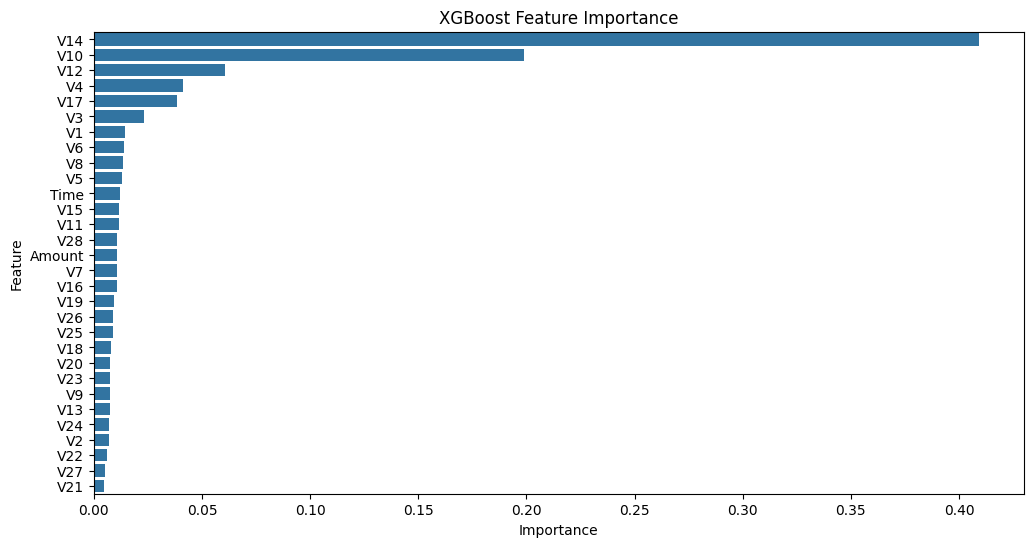

In [80]:
# Get feature importances
importances = xgb.feature_importances_
features = x_train.columns

# Create a DataFrame
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('XGBoost Feature Importance')
plt.show()

In [81]:
# SAVE MODEL to ../models/
model_path = "../models/xgb_model.pkl"

with open(model_path, "wb") as f:
    pickle.dump(xgb, f)

print("Model saved at:", model_path)

Model saved at: ../models/xgb_model.pkl
